## Import needed Libraries

In [1]:
import numpy as np 
import pandas as pd
import os, random
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from PIL import Image 
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load digit dataset

In [2]:
data = os.listdir(r"Kaggle Dataset\Digits")
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"Kaggle Dataset\Digits" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"Kaggle Dataset\Digits" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total datapoints = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total datapoints =  10160


## Splitting dataset

In [3]:
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Test Set Shape = ",test_X.shape)
print("Validation Set Shape = ",valid_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)


In [4]:
# Preprocessing the images 
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #grayscale
    img = cv2.equalizeHist(img) #enhance contrast
    img = img/255 #normalization
    return img

train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

#Reshape
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [5]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

# Model

In [6]:
model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                    

## Compiling model

In [7]:
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/50
200/200 - 63s - loss: 1.0306 - accuracy: 0.6391 - val_loss: 0.1006 - val_accuracy: 0.9689 - 63s/epoch - 314ms/step
Epoch 2/50
200/200 - 59s - loss: 0.3096 - accuracy: 0.9012 - val_loss: 0.0560 - val_accuracy: 0.9803 - 59s/epoch - 296ms/step
Epoch 3/50
200/200 - 59s - loss: 0.1948 - accuracy: 0.9390 - val_loss: 0.0776 - val_accuracy: 0.9788 - 59s/epoch - 295ms/step
Epoch 4/50
200/200 - 59s - loss: 0.1754 - accuracy: 0.9459 - val_loss: 0.0573 - val_accuracy: 0.9793 - 59s/epoch - 297ms/step
Epoch 5/50
200/200 - 59s - loss: 0.1346 - accuracy: 0.9578 - val_loss: 0.0299 - val_accuracy: 0.9912 - 59s/epoch - 295ms/step
Epoch 6/50
200/200 - 60s - loss: 0.1292 - accuracy: 0.9594 - val_loss: 0.0374 - val_accuracy: 0.9871 - 60s/epoch - 298ms/step
Epoch 7/50
200/200 - 59s - loss: 0.1145 - accuracy: 0.9642 - val_loss: 0.0429 - val_accuracy: 0.9876 - 59s/epoch - 297ms/step
Epoch 8/50
200/200 - 59s - loss: 0.1115 - accuracy: 0.9647 - val_loss: 0.0238 - val_accuracy: 0.9933 - 59s/epoch - 296

## Fit the model

In [ ]:
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 50, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

## Testing the model

In [8]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.04664290323853493
Test Accuracy = 0.9901574850082397


# Reading the puzzle

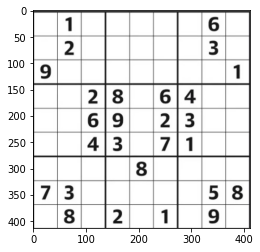

In [43]:
# Importing puzzle image to be solved
puzzle = cv2.imread("Kaggle Dataset\Sudoku.jpg")
plt.figure()
plt.imshow(puzzle)
plt.show()


## Greyscale, blue and change the puzzle image

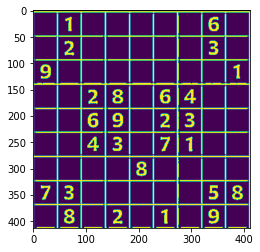

In [44]:

def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(puzzle)
plt.figure()
plt.imshow(threshold)
plt.show()

## Outline the puzzle image

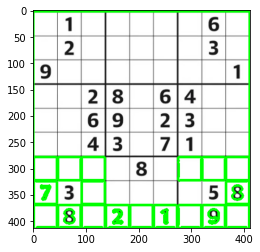

In [46]:
contour_1 = puzzle.copy()
contour_2 = puzzle.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)

plt.figure()
plt.imshow(contour_1)
plt.show()

In [47]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))
# Preprocessing Puzzle 
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= puzzle.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
    imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)


## Functions to outline, reframe and split puzzle image

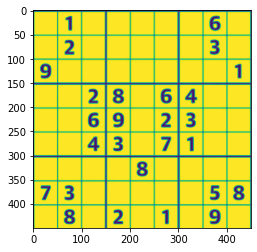

In [48]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(puzzle,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

## Splitting cell & classifying digit

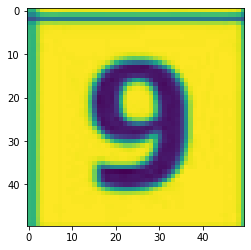

In [51]:
sudoku_cell = splitcells(imagewrap)

#Check cell number 79 (Second last cell)
plt.figure()
plt.imshow(sudoku_cell[79])
plt.show()

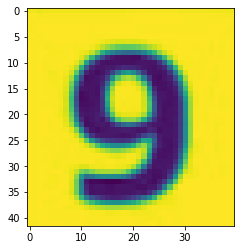

In [52]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)

plt.figure()
plt.imshow(sudoku_cell_croped[79])
plt.show()

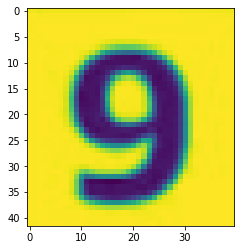

In [55]:
# Cropping the cells to avoid misclassifications due to inclusion of boundaries
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)

plt.figure()
plt.imshow(sudoku_cell_croped[79])
plt.show()

In [56]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # Preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        
        # Getting predictions and setting the values if probabilities are above 65% 
        
        predictions = model.predict(img)
        classIndex = np.argmax(predictions,axis=1)
        probabilityValue = np.amax(predictions)
        
        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

1/1 [==============================] - 0s 35ms/step


# Solving the Sudoku

In [57]:
# Reshape grid to a (9x9) matrix
grid = np.reshape(grid,(9,9))
grid

array([[0, 1, 0, 0, 0, 0, 0, 6, 0],
       [0, 2, 0, 0, 0, 0, 0, 3, 0],
       [9, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 2, 8, 0, 6, 4, 0, 0],
       [0, 0, 6, 9, 0, 2, 3, 0, 0],
       [0, 0, 4, 3, 0, 7, 1, 0, 0],
       [0, 0, 0, 0, 8, 0, 0, 0, 0],
       [7, 3, 0, 0, 0, 0, 0, 5, 8],
       [0, 8, 0, 2, 0, 1, 0, 9, 0]], dtype=int64)

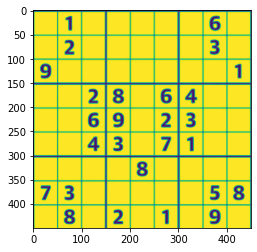

In [58]:
#Display image for comparison 
plt.figure()
plt.imshow(imagewrap)
plt.show()

## Solve sudoku function by finding missing numbers

In [36]:
def solveSudoku(board):
    for i in range(9):
        for j in range(9):
            if board[i][j]!='.':
                board[i][j] = int(board[i][j])
            else:
                board[i][j] = 0
                
    def return_empty(board):
        for i in range(9):
            for j in range(9):
                if board[i][j]==0:
                    return(i,j)
        return None
    
    def check(board,num,pos):
        row,col = pos
    
        # checking row
        for i in range(9):
            if board[row][i]==num and i!=col:
                return False
    
        # checking col
        for i in range(9):
            if board[i][col]==num and i!=row:
                return False
    
        # checking for sub-grid
        box_x = row//3
        box_y = col//3
    
        for i in range(box_x*3,box_x*3+3):
            for j in range(box_y*3,box_y*3+3):
                if board[i][j]==num and (i,j)!=pos:
                    return False
        return True
    
    def solve(board):
        vacant = return_empty(board)
        #All cells are filled and the sudoku is complete
        if vacant is None:return True 
        row,col = vacant
        for i in range(1,10):
            if check(board,i,vacant):
                board[row][col] = i
                if solve(board):
                    return True
                board[row][col] = 0
        return False
    
    solve(board)
    
    return board

In [39]:
solve(grid)

True

## Display solved soduku in grid

In [40]:
if solve(grid):
    Solved(grid)
else:
    print("Solution does not exist. This could mean that the model has misread some digits.")

3 1 7 | 4 9 3 | 8 6 2
4 2 8 | 1 6 5 | 9 3 7
9 6 5 | 7 2 8 | 5 4 1
....................
3 5 2 | 8 1 6 | 4 7 9
1 7 6 | 9 4 2 | 3 8 5
8 9 4 | 3 5 7 | 1 2 6
....................
2 4 9 | 5 8 7 | 6 1 3
7 3 1 | 6 4 9 | 2 5 8
6 8 5 | 2 3 1 | 7 9 4
